In [1]:
import h5py
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.fft import fftshift, fft, fftfreq
import numpy as np
import datetime
import pandas as pd
from dasquakes import *
import obspy
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from libcomcat.search import search
from libcomcat.dataframes import get_summary_data_frame
import matplotlib.dates as mdates
from time import perf_counter
start_time = perf_counter()

In [54]:
cable = 'whidbey'
record_length = 1 #minutes

# t0 = datetime.datetime(2022, 10, 19, 18, 51, 0) # Mooring Release
# t0 = datetime.datetime(2022, 10, 19, 19, 54, 0) # Can clearly see the source at OD 9865-9885m. Energy >200Hz! Channel 1534
t0 = datetime.datetime(2022, 10, 19, 22, 15, 0) # Can clearly see the source at channel #1662

prefix, network_name, datastore = data_wrangler(cable,record_length,t0)
data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=True)

dx = attrs['SpatialSamplingInterval']
x_max=data.shape[1] * dx

/data/data5/Converted/whidbey_2022-10-19_22-15*.h5


IndexError: index 1721 is out of bounds for axis 1 with size 1720

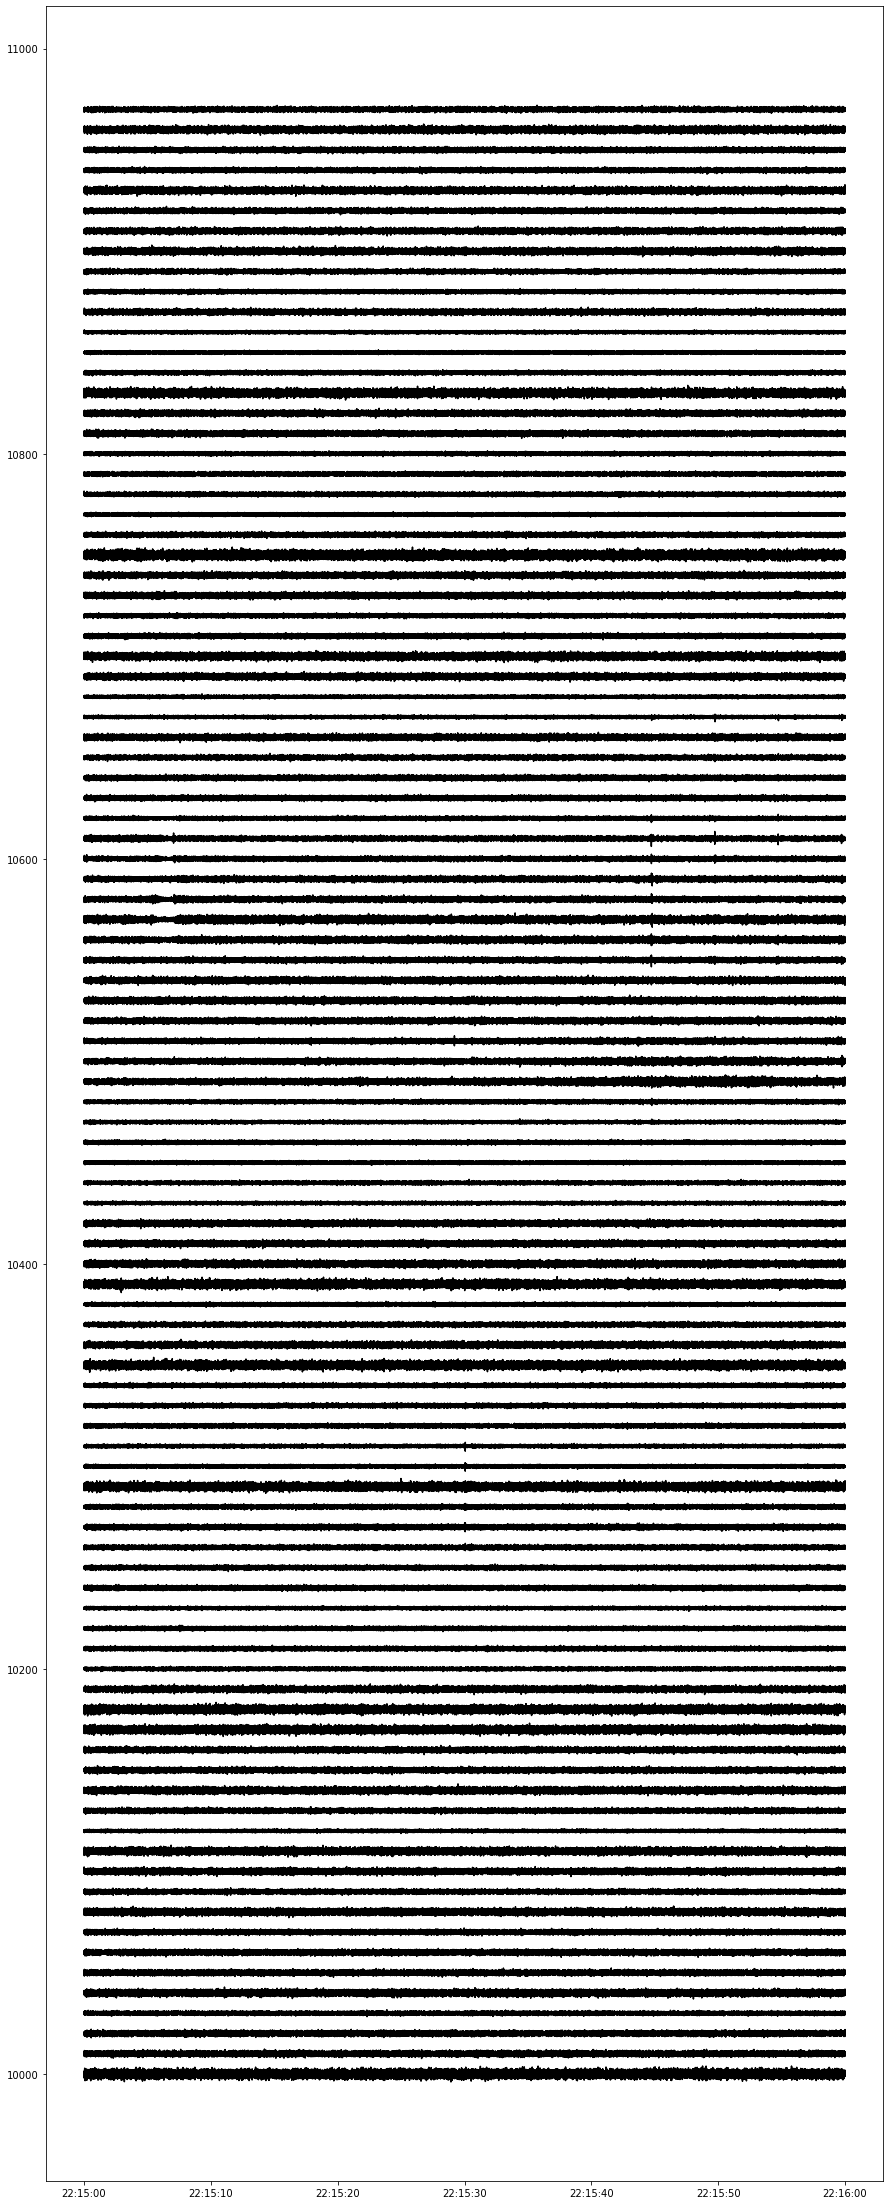

In [57]:
low_cut = 100
hi_cut = 400
b,a = butter(2,(low_cut,hi_cut),'bp',fs=attrs['MaximumFrequency']*2)

plt.subplots(figsize=(15,40))

for i,channel in enumerate(range(10000,11000,10)):
    data_one_chan = data[:, int(channel/6.38) ]
    data_filt_one_chan = filtfilt(b,a,data_one_chan,axis=0)
    plt.plot(dates,data_filt_one_chan*50 + channel,'-k')
    
#     strt = int(len(dates) * 0.58)
#     stp  = int(len(dates) * 0.585)
#     plt.xlim(dates[strt],dates[stp])


plt.grid()
plt.show()

1661


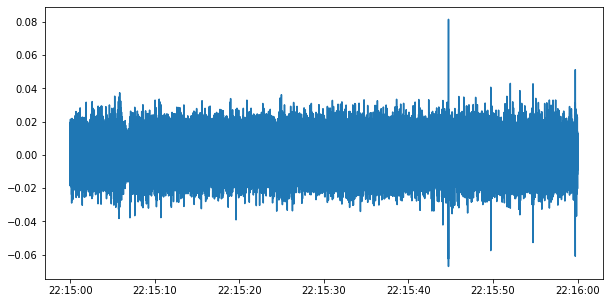

In [67]:
fig,ax=plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('w')
print(int(10600/6.38))
chan = (1662)
# for chan in chans:
plt.plot(dates,filtfilt(b,a,data[:, chan]))
# plt.title(f'Channel {chan}')

In [5]:
int(9790/6.38)

1534

Text(0.5, 0, 'Frequency, Hz')

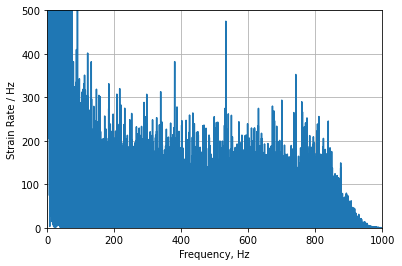

In [72]:
this_data = data[:,1663]
ft = fftshift(fft( this_data ))
f = fftshift(fftfreq(len(this_data), d=1/2/attrs['MaximumFrequency']))
plt.plot(f,np.abs(ft)**2)
# plt.yscale('log')
plt.xlim([0, 1000])
plt.ylim([0, 500])
plt.grid()
plt.ylabel('Strain Rate / Hz')
plt.xlabel('Frequency, Hz')

In [6]:
# low_cut = 0
# hi_cut = 1

# b,a = butter(2,hi_cut,'low',fs=attrs['MaximumFrequency']*2)
# data_filt = filtfilt(b,a,data,axis=0)

# data_quicklook(dates,data_filt,x_max, f'Filtered {low_cut} - {hi_cut} Hz (Nyquist {attrs["MaximumFrequency"]} Hz)',
#                das_vmax=1, network_name=network_name,ylim=[6.38*1200,6.38*1600])